In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import data
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1:].values

print(X)
print(X.shape)
print("\n")
print(y)
print(y.shape)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
(10, 1)


[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]
(10, 1)


In [5]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [6]:
# Predicting a new result
y_pred = regressor.predict([[6.5]])
print(y_pred[0])

160333.33333333334


Text(0, 0.5, 'Salary')

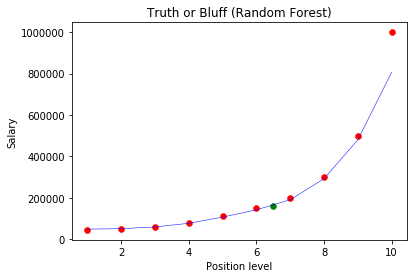

In [7]:
# Visualising the Random Forest Regression results
level = 6.5
plt.scatter(level, regressor.predict([[level]])[0], c = "green", lw = 0.5)
plt.scatter(X, y, c = "red", lw = 0.5)
plt.plot(X, regressor.predict(X), c = "blue", lw = 0.5)
plt.title("Truth or Bluff (Random Forest)")
plt.xlabel("Position level")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

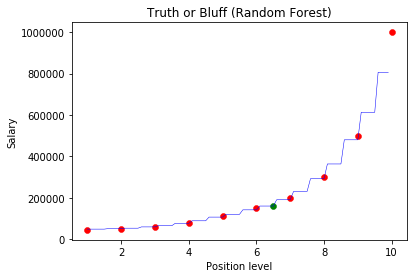

In [8]:
# Visualising the Random Forest Regression results
level = 6.5
plt.scatter(level, regressor.predict([[level]])[0], c = "green", lw = 0.5)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, c = "red", lw = 0.5)
plt.plot(X_grid, regressor.predict(X_grid), c = "blue", lw = 0.5)
plt.title("Truth or Bluff (Random Forest)")
plt.xlabel("Position level")
plt.ylabel("Salary")